In [93]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential

In [94]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [95]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [96]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)

In [97]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=[784,]))
model.add(Dropout(0,2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(10, activation='softmax'))

In [98]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [100]:
history = model.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/60
108/108 [==============================] - 6s 41ms/step - loss: 0.6974 - accuracy: 0.7678 - val_loss: 0.4651 - val_accuracy: 0.8408
Epoch 2/60
108/108 [==============================] - 4s 39ms/step - loss: 0.4356 - accuracy: 0.8470 - val_loss: 0.3969 - val_accuracy: 0.8592
Epoch 3/60
108/108 [==============================] - 4s 34ms/step - loss: 0.3952 - accuracy: 0.8597 - val_loss: 0.3699 - val_accuracy: 0.8694
Epoch 4/60
108/108 [==============================] - 4s 37ms/step - loss: 0.3630 - accuracy: 0.8699 - val_loss: 0.3585 - val_accuracy: 0.8744
Epoch 5/60
108/108 [==============================] - 5s 42ms/step - loss: 0.3409 - accuracy: 0.8774 - val_loss: 0.3630 - val_accuracy: 0.8710
Epoch 6/60
108/108 [==============================] - 6s 52ms/step - loss: 0.3281 - accuracy: 0.8822 - val_loss: 0.3305 - val_accuracy: 0.8794
Epoch 7/60
108/108 [==============================] - 5s 51ms/step - loss: 0.3110 - accuracy: 0.8880 - val_loss: 0.3337 - val_accuracy: 0.8816

In [101]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 3s 7ms/step - loss: 98.5209 - accuracy: 0.8651
[98.52092742919922, 0.8651000261306763]


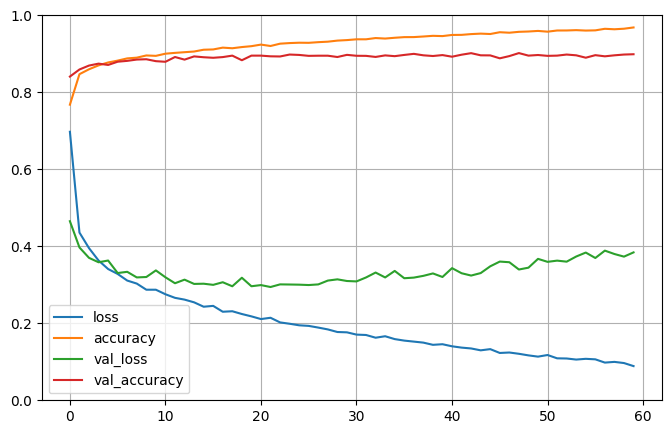

In [102]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 2s 5ms/step


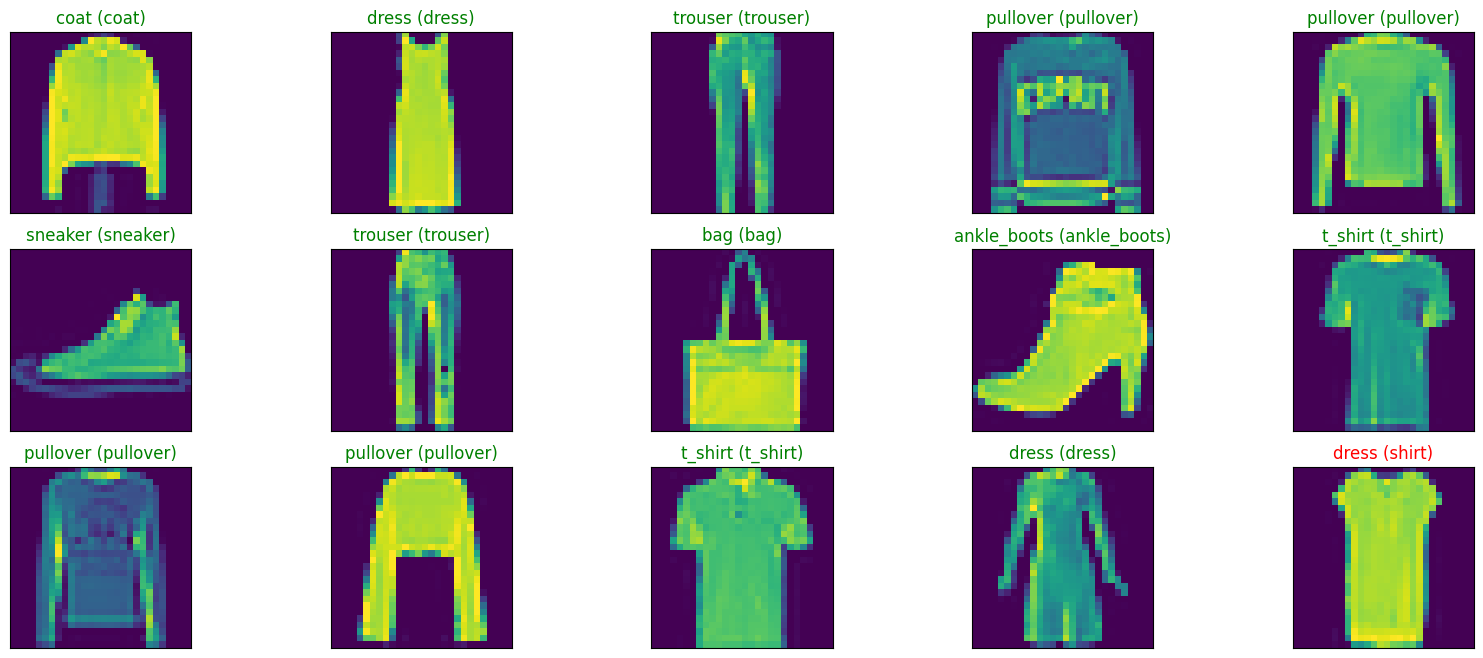

In [103]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)
X_test = X_test.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))